<!--BOOK_INFORMATION-->
<img style="float: right; width: 100px" src="https://raw.github.com/pyomeca/design/master/logo/logo_cropped_doc.svg?sanitize=true">
<font size="+3">Effective computation in Biomechanics</font>

<font size="+2">Romain Martinez</font> <a href="https://github.com/romainmartinez"><img src="https://img.shields.io/badge/github-romainmartinez-green?logo=github&style=social" /></a>

<!--NAVIGATION-->
< [Introduction to musculoskeletal modelling](02.00-musculoskeletal-modelling.ipynb) | [Contents](index.ipynb) |

# Advanced Statistical Analysis of Biomechanical Time Series

## Statistical Parametric Mapping in Theory

Slides: [![Netlify Status](https://api.netlify.com/api/v1/badges/4244e50a-0d6c-4cb5-bdae-9e9974730f66/deploy-status)](https://mrtnz-stats.netlify.com/)

## Statistical Parametric Mapping in Practice

- how to choose a test
- what to report
- what to plot
- steps (see org file)
- Examples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spm1d

%load_ext lab_black

sns.set(style="ticks", context="talk")

np.random.seed(42)

### Quick overview

In `spm1d`, statistical testing is performed in two stages:

1. Test statistic computation
2. Statistical inference

Let's see how the procedure works with random data

#### __Generate data__

In [2]:
observations = 10
nodes = 100

data = spm1d.rft1d.randn1d(observations, nodes)

In `spm1d`, we organize the data such as 
$$\text{observations (rows)} \times \text{nodes (columns)}$$

In [3]:
data.shape

(10, 100)

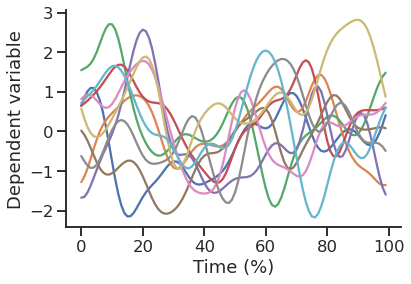

In [5]:
# we transpose the data because nodes should be on the first dimensions with matplotlib
plt.plot(data.T)

plt.ylabel("Dependent variable")
plt.xlabel("Time (%)")

sns.despine()

Mean and standard deviation can be visualized:

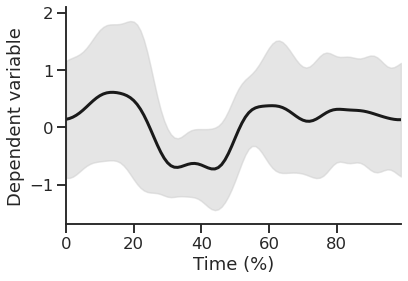

In [6]:
spm1d.plot.plot_mean_sd(data)

plt.ylabel("Dependent variable")
plt.xlabel("Time (%)")

sns.despine()

Let's divide our data into two groups and perform a t-test:

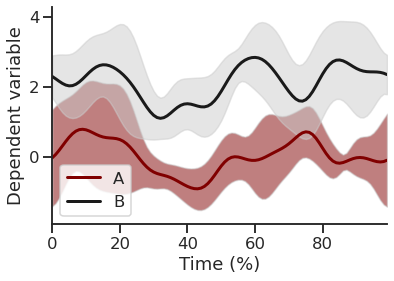

In [53]:
group_a = data[:5, :]
group_b = data[5:, :] + 2
maroon = "#800000"

spm1d.plot.plot_mean_sd(group_a, linecolor=maroon, facecolor=maroon, label="A")
spm1d.plot.plot_mean_sd(group_b, label="B")

plt.ylabel("Dependent variable")
plt.xlabel("Time (%)")
plt.legend()

sns.despine()

#### __Test statistic computation__

A two-sample t-test statistic can be computed as follows:

In [54]:
t = spm1d.stats.ttest2(group_a, group_b)

The test statistic can be visualized as follows:

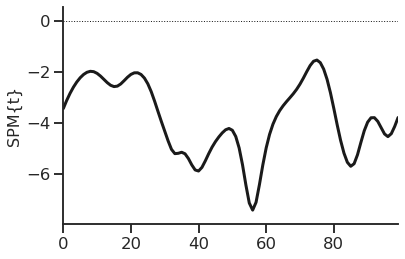

In [55]:
t.plot()
sns.despine()

Note that computing the test statistic does __not__ constitute statistical testing.
At this point we have conducted precisely zero statistical tests.

A statistical test is conducted only when we quantify the probability that random data would produce particular features of our test statistic.

#### __Statistical inference__

Now that we have the test statistic, we can conduct the statistical inference as follows:

In [56]:
ti = t.inference(alpha=0.05, two_tailed=True)

and can be visualized:

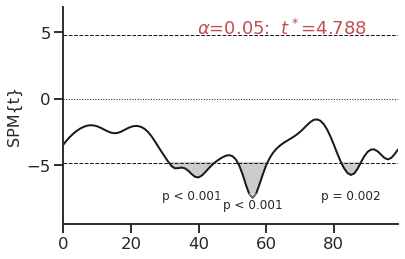

In [57]:
ti.plot()
ti.plot_threshold_label()
ti.plot_p_values(size=12, offset_all_clusters=(0, -2))

sns.despine()

In this plot:
    
- The black line depicts the test statistic ($t$ in this case)

- The red hashed line depicts the critical threshold at $\alpha = 0.05%$

    - From a classical hypothesis testing perspective, the null hypothesis is rejected at alpha if the SPM{t} exceeds this threshold.


- The $p$-value indicates the probability that __smooth__, random continua would produce a supra-threshold cluster as __broad__ as the observed cluster.
    
    - Here “smooth” means the same smoothness as the residual continua, and “broad” means the proportion of the continuum spanned by a suprathreshold cluster.

<!--NAVIGATION-->
< [Introduction to musculoskeletal modelling](02.00-musculoskeletal-modelling.ipynb) | [Contents](index.ipynb) |